# Lab Case Study

## Scenario

You are working as an analyst for an auto insurance company. The company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

## Business Objectives

- Retain customers,
- analyze relevant customer data,
- develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

## Activities

Refer to the [`Activities.md`](./Activities.md) file where you will find guidelines for some of the activities that you want to do.

## Data

The csv files is provided in the folder. The columns in the file are self-explanatory.


In [549]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100
## Install xlrd package to load Excel files
#!conda install openpyxl
#!conda install xlrd

# Reading Data

In [550]:
file1 = pd.read_csv('Data/file1.csv')
file1

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [551]:
file2 = pd.read_csv('Data/file2.csv')
file2

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Total Claim Amount,Policy Type,Vehicle Class
0,GS98873,Arizona,F,Bachelor,323912.47%,16061,88,1/0/00,633.600000,Personal Auto,Four-Door Car
1,CW49887,California,F,Master,462680.11%,79487,114,1/0/00,547.200000,Special Auto,SUV
2,MY31220,California,F,College,899704.02%,54230,112,1/0/00,537.600000,Personal Auto,Two-Door Car
3,UH35128,Oregon,F,College,2580706.30%,71210,214,1/1/00,1027.200000,Personal Auto,Luxury Car
4,WH52799,Arizona,F,College,380812.21%,94903,94,1/0/00,451.200000,Corporate Auto,Two-Door Car
...,...,...,...,...,...,...,...,...,...,...,...
991,HV85198,Arizona,M,Master,847141.75%,63513,70,1/0/00,185.667213,Personal Auto,Four-Door Car
992,BS91566,Arizona,F,College,543121.91%,58161,68,1/0/00,140.747286,Corporate Auto,Four-Door Car
993,IL40123,Nevada,F,College,568964.41%,83640,70,1/0/00,471.050488,Corporate Auto,Two-Door Car
994,MY32149,California,F,Master,368672.38%,0,96,1/0/00,28.460568,Personal Auto,Two-Door Car


In [552]:
file3 = pd.read_csv('Data/file3.csv')
file3

,Customer,State,Customer Lifetime Value,Education,Gender,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Total Claim Amount,Vehicle Class
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
2,ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car
3,KX23516,California,4455.843406,High School or Below,F,0,121,0,Personal Auto,699.615192,SUV
4,FN77294,California,7704.958480,High School or Below,M,30366,101,2,Personal Auto,484.800000,SUV
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,23405.987980,Bachelor,M,71941,73,0,Personal Auto,198.234764,Four-Door Car
7066,PK87824,California,3096.511217,College,F,21604,79,0,Corporate Auto,379.200000,Four-Door Car
7067,TD14365,California,8163.890428,Bachelor,M,0,85,3,Corporate Auto,790.784983,Four-Door Car
7068,UP19263,California,7524.442436,College,M,21941,96,0,Personal Auto,691.200000,Four-Door Car


In [553]:
file1 = file1.reindex(sorted(file1.columns), axis=1)
file2 = file2.reindex(sorted(file2.columns), axis=1)
file3 = file3.reindex(sorted(file3.columns), axis=1)

In [554]:
def rename_columns(file1):
    file1.rename(columns={'GENDER':'Gender','ST':'State'}, inplace=True )
    return file1

In [555]:
file1=rename_columns(file1)
file1

,Customer,Customer Lifetime Value,Education,Gender,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,State,Total Claim Amount,Vehicle Class
0,RB50392,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Washington,2.704934,Four-Door Car
1,QZ44356,697953.59%,Bachelor,F,0.0,94.0,1/0/00,Personal Auto,Arizona,1131.464935,Four-Door Car
2,AI49188,1288743.17%,Bachelor,F,48767.0,108.0,1/0/00,Personal Auto,Nevada,566.472247,Two-Door Car
3,WW63253,764586.18%,Bachelor,M,0.0,106.0,1/0/00,Corporate Auto,California,529.881344,SUV
4,GA49547,536307.65%,High School or Below,M,36357.0,68.0,1/0/00,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [556]:
def rename_columns(file2):
    file2.rename(columns={'GENDER':'Gender','ST':'State'}, inplace=True )
    return file2

In [557]:
file2=rename_columns(file2)
file2

,Customer,Customer Lifetime Value,Education,Gender,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,State,Total Claim Amount,Vehicle Class
0,GS98873,323912.47%,Bachelor,F,16061,88,1/0/00,Personal Auto,Arizona,633.600000,Four-Door Car
1,CW49887,462680.11%,Master,F,79487,114,1/0/00,Special Auto,California,547.200000,SUV
2,MY31220,899704.02%,College,F,54230,112,1/0/00,Personal Auto,California,537.600000,Two-Door Car
3,UH35128,2580706.30%,College,F,71210,214,1/1/00,Personal Auto,Oregon,1027.200000,Luxury Car
4,WH52799,380812.21%,College,F,94903,94,1/0/00,Corporate Auto,Arizona,451.200000,Two-Door Car
...,...,...,...,...,...,...,...,...,...,...,...
991,HV85198,847141.75%,Master,M,63513,70,1/0/00,Personal Auto,Arizona,185.667213,Four-Door Car
992,BS91566,543121.91%,College,F,58161,68,1/0/00,Corporate Auto,Arizona,140.747286,Four-Door Car
993,IL40123,568964.41%,College,F,83640,70,1/0/00,Corporate Auto,Nevada,471.050488,Two-Door Car
994,MY32149,368672.38%,Master,F,0,96,1/0/00,Personal Auto,California,28.460568,Two-Door Car


In [558]:
def rename_columns(file3):
    file3.rename(columns={'GENDER':'Gender','ST':'State'}, inplace=True )
    return file3

In [559]:
file=rename_columns(file3)
file3

,Customer,Customer Lifetime Value,Education,Gender,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,State,Total Claim Amount,Vehicle Class
0,SA25987,3479.137523,High School or Below,M,0,104,0,Personal Auto,Washington,499.200000,Two-Door Car
1,TB86706,2502.637401,Master,M,0,66,0,Personal Auto,Arizona,3.468912,Two-Door Car
2,ZL73902,3265.156348,Bachelor,F,25820,82,0,Personal Auto,Nevada,393.600000,Four-Door Car
3,KX23516,4455.843406,High School or Below,F,0,121,0,Personal Auto,California,699.615192,SUV
4,FN77294,7704.958480,High School or Below,M,30366,101,2,Personal Auto,California,484.800000,SUV
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,23405.987980,Bachelor,M,71941,73,0,Personal Auto,California,198.234764,Four-Door Car
7066,PK87824,3096.511217,College,F,21604,79,0,Corporate Auto,California,379.200000,Four-Door Car
7067,TD14365,8163.890428,Bachelor,M,0,85,3,Corporate Auto,California,790.784983,Four-Door Car
7068,UP19263,7524.442436,College,M,21941,96,0,Personal Auto,California,691.200000,Four-Door Car


# Aggregating data into one Data Frame

In [560]:
def load_original_data():
    return pd.concat([file1,file2,file3], axis=0)

In [561]:
hk_df=load_original_data()
hk_df

,Customer,Customer Lifetime Value,Education,Gender,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,State,Total Claim Amount,Vehicle Class
0,RB50392,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Washington,2.704934,Four-Door Car
1,QZ44356,697953.59%,Bachelor,F,0.0,94.0,1/0/00,Personal Auto,Arizona,1131.464935,Four-Door Car
2,AI49188,1288743.17%,Bachelor,F,48767.0,108.0,1/0/00,Personal Auto,Nevada,566.472247,Two-Door Car
3,WW63253,764586.18%,Bachelor,M,0.0,106.0,1/0/00,Corporate Auto,California,529.881344,SUV
4,GA49547,536307.65%,High School or Below,M,36357.0,68.0,1/0/00,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,23405.98798,Bachelor,M,71941.0,73.0,0,Personal Auto,California,198.234764,Four-Door Car
7066,PK87824,3096.511217,College,F,21604.0,79.0,0,Corporate Auto,California,379.200000,Four-Door Car
7067,TD14365,8163.890428,Bachelor,M,0.0,85.0,3,Corporate Auto,California,790.784983,Four-Door Car
7068,UP19263,7524.442436,College,M,21941.0,96.0,0,Personal Auto,California,691.200000,Four-Door Car


In [562]:
def lower_case_column_names(hk_df):
    hk_df.columns=[i.lower() for i in hk_df.columns]
    return hk_df

In [563]:
hk_df=lower_case_column_names(hk_df)
hk_df

,customer,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,RB50392,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Washington,2.704934,Four-Door Car
1,QZ44356,697953.59%,Bachelor,F,0.0,94.0,1/0/00,Personal Auto,Arizona,1131.464935,Four-Door Car
2,AI49188,1288743.17%,Bachelor,F,48767.0,108.0,1/0/00,Personal Auto,Nevada,566.472247,Two-Door Car
3,WW63253,764586.18%,Bachelor,M,0.0,106.0,1/0/00,Corporate Auto,California,529.881344,SUV
4,GA49547,536307.65%,High School or Below,M,36357.0,68.0,1/0/00,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,23405.98798,Bachelor,M,71941.0,73.0,0,Personal Auto,California,198.234764,Four-Door Car
7066,PK87824,3096.511217,College,F,21604.0,79.0,0,Corporate Auto,California,379.200000,Four-Door Car
7067,TD14365,8163.890428,Bachelor,M,0.0,85.0,3,Corporate Auto,California,790.784983,Four-Door Car
7068,UP19263,7524.442436,College,M,21941.0,96.0,0,Personal Auto,California,691.200000,Four-Door Car


In [564]:
hk=hk_df.reset_index()
hk

,index,customer,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,0,RB50392,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Washington,2.704934,Four-Door Car
1,1,QZ44356,697953.59%,Bachelor,F,0.0,94.0,1/0/00,Personal Auto,Arizona,1131.464935,Four-Door Car
2,2,AI49188,1288743.17%,Bachelor,F,48767.0,108.0,1/0/00,Personal Auto,Nevada,566.472247,Two-Door Car
3,3,WW63253,764586.18%,Bachelor,M,0.0,106.0,1/0/00,Corporate Auto,California,529.881344,SUV
4,4,GA49547,536307.65%,High School or Below,M,36357.0,68.0,1/0/00,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...,...,...
12069,7065,LA72316,23405.98798,Bachelor,M,71941.0,73.0,0,Personal Auto,California,198.234764,Four-Door Car
12070,7066,PK87824,3096.511217,College,F,21604.0,79.0,0,Corporate Auto,California,379.200000,Four-Door Car
12071,7067,TD14365,8163.890428,Bachelor,M,0.0,85.0,3,Corporate Auto,California,790.784983,Four-Door Car
12072,7068,UP19263,7524.442436,College,M,21941.0,96.0,0,Personal Auto,California,691.200000,Four-Door Car


## Dropping unnecessary columns

In [565]:
def drop_columns(hk) :
    hk.drop(columns=["index","customer"], inplace=True)
    return hk

In [566]:
drop_columns(hk)


,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Washington,2.704934,Four-Door Car
1,697953.59%,Bachelor,F,0.0,94.0,1/0/00,Personal Auto,Arizona,1131.464935,Four-Door Car
2,1288743.17%,Bachelor,F,48767.0,108.0,1/0/00,Personal Auto,Nevada,566.472247,Two-Door Car
3,764586.18%,Bachelor,M,0.0,106.0,1/0/00,Corporate Auto,California,529.881344,SUV
4,536307.65%,High School or Below,M,36357.0,68.0,1/0/00,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
12069,23405.98798,Bachelor,M,71941.0,73.0,0,Personal Auto,California,198.234764,Four-Door Car
12070,3096.511217,College,F,21604.0,79.0,0,Corporate Auto,California,379.200000,Four-Door Car
12071,8163.890428,Bachelor,M,0.0,85.0,3,Corporate Auto,California,790.784983,Four-Door Car
12072,7524.442436,College,M,21941.0,96.0,0,Personal Auto,California,691.200000,Four-Door Car


In [567]:
ck=hk.drop_duplicates()
ck

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Washington,2.704934,Four-Door Car
1,697953.59%,Bachelor,F,0.0,94.0,1/0/00,Personal Auto,Arizona,1131.464935,Four-Door Car
2,1288743.17%,Bachelor,F,48767.0,108.0,1/0/00,Personal Auto,Nevada,566.472247,Two-Door Car
3,764586.18%,Bachelor,M,0.0,106.0,1/0/00,Corporate Auto,California,529.881344,SUV
4,536307.65%,High School or Below,M,36357.0,68.0,1/0/00,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
12069,23405.98798,Bachelor,M,71941.0,73.0,0,Personal Auto,California,198.234764,Four-Door Car
12070,3096.511217,College,F,21604.0,79.0,0,Corporate Auto,California,379.200000,Four-Door Car
12071,8163.890428,Bachelor,M,0.0,85.0,3,Corporate Auto,California,790.784983,Four-Door Car
12072,7524.442436,College,M,21941.0,96.0,0,Personal Auto,California,691.200000,Four-Door Car


In [568]:
ch=ck.reset_index()
ch

,index,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,0,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Washington,2.704934,Four-Door Car
1,1,697953.59%,Bachelor,F,0.0,94.0,1/0/00,Personal Auto,Arizona,1131.464935,Four-Door Car
2,2,1288743.17%,Bachelor,F,48767.0,108.0,1/0/00,Personal Auto,Nevada,566.472247,Two-Door Car
3,3,764586.18%,Bachelor,M,0.0,106.0,1/0/00,Corporate Auto,California,529.881344,SUV
4,4,536307.65%,High School or Below,M,36357.0,68.0,1/0/00,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...,...
8877,12069,23405.98798,Bachelor,M,71941.0,73.0,0,Personal Auto,California,198.234764,Four-Door Car
8878,12070,3096.511217,College,F,21604.0,79.0,0,Corporate Auto,California,379.200000,Four-Door Car
8879,12071,8163.890428,Bachelor,M,0.0,85.0,3,Corporate Auto,California,790.784983,Four-Door Car
8880,12072,7524.442436,College,M,21941.0,96.0,0,Personal Auto,California,691.200000,Four-Door Car


In [569]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8882 entries, 0 to 8881
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      8882 non-null   int64  
 1   customer lifetime value    8874 non-null   object 
 2   education                  8881 non-null   object 
 3   gender                     8759 non-null   object 
 4   income                     8881 non-null   float64
 5   monthly premium auto       8881 non-null   float64
 6   number of open complaints  8881 non-null   object 
 7   policy type                8881 non-null   object 
 8   state                      8881 non-null   object 
 9   total claim amount         8881 non-null   float64
 10  vehicle class              8881 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 763.4+ KB


##  Working with data types

In [570]:
ch['customer lifetime value'] = ch['customer lifetime value'].apply(lambda x: float(x.rstrip(x[-1]))/100 if str(x).endswith('%') else x)

In [571]:
ch

,index,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,0,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Washington,2.704934,Four-Door Car
1,1,6979.535900,Bachelor,F,0.0,94.0,1/0/00,Personal Auto,Arizona,1131.464935,Four-Door Car
2,2,12887.431700,Bachelor,F,48767.0,108.0,1/0/00,Personal Auto,Nevada,566.472247,Two-Door Car
3,3,7645.861800,Bachelor,M,0.0,106.0,1/0/00,Corporate Auto,California,529.881344,SUV
4,4,5363.076500,High School or Below,M,36357.0,68.0,1/0/00,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...,...
8877,12069,23405.987980,Bachelor,M,71941.0,73.0,0,Personal Auto,California,198.234764,Four-Door Car
8878,12070,3096.511217,College,F,21604.0,79.0,0,Corporate Auto,California,379.200000,Four-Door Car
8879,12071,8163.890428,Bachelor,M,0.0,85.0,3,Corporate Auto,California,790.784983,Four-Door Car
8880,12072,7524.442436,College,M,21941.0,96.0,0,Personal Auto,California,691.200000,Four-Door Car


In [572]:
def drop_columns(ch) :
    ch.drop(columns=["index"], inplace=True)
    return ch

In [573]:
drop_columns(ch)

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Washington,2.704934,Four-Door Car
1,6979.535900,Bachelor,F,0.0,94.0,1/0/00,Personal Auto,Arizona,1131.464935,Four-Door Car
2,12887.431700,Bachelor,F,48767.0,108.0,1/0/00,Personal Auto,Nevada,566.472247,Two-Door Car
3,7645.861800,Bachelor,M,0.0,106.0,1/0/00,Corporate Auto,California,529.881344,SUV
4,5363.076500,High School or Below,M,36357.0,68.0,1/0/00,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
8877,23405.987980,Bachelor,M,71941.0,73.0,0,Personal Auto,California,198.234764,Four-Door Car
8878,3096.511217,College,F,21604.0,79.0,0,Corporate Auto,California,379.200000,Four-Door Car
8879,8163.890428,Bachelor,M,0.0,85.0,3,Corporate Auto,California,790.784983,Four-Door Car
8880,7524.442436,College,M,21941.0,96.0,0,Personal Auto,California,691.200000,Four-Door Car


In [574]:
ch['customer lifetime value'].astype 

<bound method NDFrame.astype of 0                NaN
1        6979.535900
2       12887.431700
3        7645.861800
4        5363.076500
            ...     
8877    23405.987980
8878     3096.511217
8879     8163.890428
8880     7524.442436
8881     2611.836866
Name: customer lifetime value, Length: 8882, dtype: float64>

In [575]:
ch['customer lifetime value'] = ch['customer lifetime value'].astype(float)
ch                                              

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Washington,2.704934,Four-Door Car
1,6979.535900,Bachelor,F,0.0,94.0,1/0/00,Personal Auto,Arizona,1131.464935,Four-Door Car
2,12887.431700,Bachelor,F,48767.0,108.0,1/0/00,Personal Auto,Nevada,566.472247,Two-Door Car
3,7645.861800,Bachelor,M,0.0,106.0,1/0/00,Corporate Auto,California,529.881344,SUV
4,5363.076500,High School or Below,M,36357.0,68.0,1/0/00,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
8877,23405.987980,Bachelor,M,71941.0,73.0,0,Personal Auto,California,198.234764,Four-Door Car
8878,3096.511217,College,F,21604.0,79.0,0,Corporate Auto,California,379.200000,Four-Door Car
8879,8163.890428,Bachelor,M,0.0,85.0,3,Corporate Auto,California,790.784983,Four-Door Car
8880,7524.442436,College,M,21941.0,96.0,0,Personal Auto,California,691.200000,Four-Door Car


## Cleaning the number of open complaints and extracting the middle number

In [576]:
ch['number of open complaints'].value_counts()

0         5421
1/0/00    1618
1          749
2          279
1/1/00     245
3          221
4          114
1/2/00      93
1/3/00      58
5           43
1/4/00      28
1/5/00      12
Name: number of open complaints, dtype: int64

In [577]:
ch['number of open complaints'] = ch['number of open complaints'].apply(lambda x: str(x).split('/')[1] if len(str(x).split('/')) >1 else x)

In [578]:
#rep = lambda x: x.replace('1/0/00','0') if x=='1/0/00' else x
#ch['number of open complaints'] = ch['number of open complaints'].apply(rep)

In [579]:
#rep = lambda x: x.replace('1/1/00','1') if x=='1/1/00' else x
#ch['number of open complaints'] = ch['number of open complaints'].apply(rep)

In [580]:
#rep = lambda x: x.replace('1/2/00','2') if x=='1/2/00' else x
#ch['number of open complaints'] = ch['number of open complaints'].apply(rep)

In [581]:
#rep = lambda x: x.replace('1/3/00','3') if x=='1/3/00' else x
#ch['number of open complaints'] = ch['number of open complaints'].apply(rep)

In [582]:
#rep = lambda x: x.replace('1/4/00','4') if x=='1/4/00' else x
#ch['number of open complaints'] = ch['number of open complaints'].apply(rep)

In [583]:
#rep = lambda x: x.replace('1/5/00','5') if x=='1/5/00' else x
#ch['number of open complaints'] = ch['number of open complaints'].apply(rep)

In [584]:
ch

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,NaN,Master,NaN,0.0,1000.0,0,Personal Auto,Washington,2.704934,Four-Door Car
1,6979.535900,Bachelor,F,0.0,94.0,0,Personal Auto,Arizona,1131.464935,Four-Door Car
2,12887.431700,Bachelor,F,48767.0,108.0,0,Personal Auto,Nevada,566.472247,Two-Door Car
3,7645.861800,Bachelor,M,0.0,106.0,0,Corporate Auto,California,529.881344,SUV
4,5363.076500,High School or Below,M,36357.0,68.0,0,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
8877,23405.987980,Bachelor,M,71941.0,73.0,0,Personal Auto,California,198.234764,Four-Door Car
8878,3096.511217,College,F,21604.0,79.0,0,Corporate Auto,California,379.200000,Four-Door Car
8879,8163.890428,Bachelor,M,0.0,85.0,3,Corporate Auto,California,790.784983,Four-Door Car
8880,7524.442436,College,M,21941.0,96.0,0,Personal Auto,California,691.200000,Four-Door Car


In [585]:
ch['number of open complaints'].value_counts()

0    5421
0    1618
1     749
2     279
1     245
3     221
4     114
2      93
3      58
5      43
4      28
5      12
Name: number of open complaints, dtype: int64

In [586]:
ch['number of open complaints'] = ch['number of open complaints'].fillna(0)
ch

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,NaN,Master,NaN,0.0,1000.0,0,Personal Auto,Washington,2.704934,Four-Door Car
1,6979.535900,Bachelor,F,0.0,94.0,0,Personal Auto,Arizona,1131.464935,Four-Door Car
2,12887.431700,Bachelor,F,48767.0,108.0,0,Personal Auto,Nevada,566.472247,Two-Door Car
3,7645.861800,Bachelor,M,0.0,106.0,0,Corporate Auto,California,529.881344,SUV
4,5363.076500,High School or Below,M,36357.0,68.0,0,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
8877,23405.987980,Bachelor,M,71941.0,73.0,0,Personal Auto,California,198.234764,Four-Door Car
8878,3096.511217,College,F,21604.0,79.0,0,Corporate Auto,California,379.200000,Four-Door Car
8879,8163.890428,Bachelor,M,0.0,85.0,3,Corporate Auto,California,790.784983,Four-Door Car
8880,7524.442436,College,M,21941.0,96.0,0,Personal Auto,California,691.200000,Four-Door Car


In [587]:
ch['number of open complaints'].value_counts()

0    5422
0    1618
1     749
2     279
1     245
3     221
4     114
2      93
3      58
5      43
4      28
5      12
Name: number of open complaints, dtype: int64

## Filtering data and Correcting typos

In [588]:
ch['gender'].value_counts()

F         4435
M         4237
Male        40
female      30
Femal       17
Name: gender, dtype: int64

In [589]:
def clean_gender(x):
    if x in ['M', 'Male',"male"]:
        return 'Male'
    elif x in ['F', 'female',"Femal"]:
        return 'Female'
    elif np.nan:  pass
    else:
        return 'U'

In [590]:
ch['gender'] = list(map(clean_gender, ch['gender'])) 
ch

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,NaN,Master,None,0.0,1000.0,0,Personal Auto,Washington,2.704934,Four-Door Car
1,6979.535900,Bachelor,Female,0.0,94.0,0,Personal Auto,Arizona,1131.464935,Four-Door Car
2,12887.431700,Bachelor,Female,48767.0,108.0,0,Personal Auto,Nevada,566.472247,Two-Door Car
3,7645.861800,Bachelor,Male,0.0,106.0,0,Corporate Auto,California,529.881344,SUV
4,5363.076500,High School or Below,Male,36357.0,68.0,0,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
8877,23405.987980,Bachelor,Male,71941.0,73.0,0,Personal Auto,California,198.234764,Four-Door Car
8878,3096.511217,College,Female,21604.0,79.0,0,Corporate Auto,California,379.200000,Four-Door Car
8879,8163.890428,Bachelor,Male,0.0,85.0,3,Corporate Auto,California,790.784983,Four-Door Car
8880,7524.442436,College,Male,21941.0,96.0,0,Personal Auto,California,691.200000,Four-Door Car


In [591]:
ch['state'].value_counts()

California    2925
Oregon        2512
Arizona       1591
Nevada         867
Washington     762
Cali           120
AZ              74
WA              30
Name: state, dtype: int64

In [592]:
def clean_state(x):
    if x in ['California', 'Cali']:
        return 'California'
    elif x in ['Arizona', 'AZ']:
        return 'Arizona'
    elif x in ['Washington', 'WA']:
        return 'Washington'
    elif x in ['Nevada']:
        return 'Nevada'
    elif x in ['Oregon']:
        return 'Oregon'
    elif np.nan:  pass
    else:
        return x

In [593]:
ch['state'] = list(map(clean_state, ch['state'])) 
ch

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,NaN,Master,None,0.0,1000.0,0,Personal Auto,Washington,2.704934,Four-Door Car
1,6979.535900,Bachelor,Female,0.0,94.0,0,Personal Auto,Arizona,1131.464935,Four-Door Car
2,12887.431700,Bachelor,Female,48767.0,108.0,0,Personal Auto,Nevada,566.472247,Two-Door Car
3,7645.861800,Bachelor,Male,0.0,106.0,0,Corporate Auto,California,529.881344,SUV
4,5363.076500,High School or Below,Male,36357.0,68.0,0,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
8877,23405.987980,Bachelor,Male,71941.0,73.0,0,Personal Auto,California,198.234764,Four-Door Car
8878,3096.511217,College,Female,21604.0,79.0,0,Corporate Auto,California,379.200000,Four-Door Car
8879,8163.890428,Bachelor,Male,0.0,85.0,3,Corporate Auto,California,790.784983,Four-Door Car
8880,7524.442436,College,Male,21941.0,96.0,0,Personal Auto,California,691.200000,Four-Door Car


In [594]:
ch['state'].value_counts()

California    3045
Oregon        2512
Arizona       1665
Nevada         867
Washington     792
Name: state, dtype: int64

In [595]:
ch['education'].value_counts()

Bachelor                2655
College                 2594
High School or Below    2550
Master                   727
Doctor                   331
Bachelors                 24
Name: education, dtype: int64

In [596]:
def clean_education(x):
    if x in ['Bachelor', 'Bachelors']:
        return 'Bachelor'
    else: 
        return x
        

In [597]:
ch['education'] = list(map(clean_education, ch['education'])) 
ch

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,NaN,Master,None,0.0,1000.0,0,Personal Auto,Washington,2.704934,Four-Door Car
1,6979.535900,Bachelor,Female,0.0,94.0,0,Personal Auto,Arizona,1131.464935,Four-Door Car
2,12887.431700,Bachelor,Female,48767.0,108.0,0,Personal Auto,Nevada,566.472247,Two-Door Car
3,7645.861800,Bachelor,Male,0.0,106.0,0,Corporate Auto,California,529.881344,SUV
4,5363.076500,High School or Below,Male,36357.0,68.0,0,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
8877,23405.987980,Bachelor,Male,71941.0,73.0,0,Personal Auto,California,198.234764,Four-Door Car
8878,3096.511217,College,Female,21604.0,79.0,0,Corporate Auto,California,379.200000,Four-Door Car
8879,8163.890428,Bachelor,Male,0.0,85.0,3,Corporate Auto,California,790.784983,Four-Door Car
8880,7524.442436,College,Male,21941.0,96.0,0,Personal Auto,California,691.200000,Four-Door Car


Replacing null values – Replace missing values with means of the column (for numerical columns). Pay attention that the Income feature for instance has 0s which is equivalent to null values. (We assume here that there is no such income with 0 as it refers to missing values)
Hint: numpy.nan is considered of float64 data type.

In [598]:
mean_customer_lifetime_value = int(np.mean(ch['customer lifetime value']))
mean_customer_lifetime_value

7983

In [599]:
ch['customer lifetime value'] = ch['customer lifetime value'].fillna(mean_customer_lifetime_value)
ch

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,7983.000000,Master,None,0.0,1000.0,0,Personal Auto,Washington,2.704934,Four-Door Car
1,6979.535900,Bachelor,Female,0.0,94.0,0,Personal Auto,Arizona,1131.464935,Four-Door Car
2,12887.431700,Bachelor,Female,48767.0,108.0,0,Personal Auto,Nevada,566.472247,Two-Door Car
3,7645.861800,Bachelor,Male,0.0,106.0,0,Corporate Auto,California,529.881344,SUV
4,5363.076500,High School or Below,Male,36357.0,68.0,0,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
8877,23405.987980,Bachelor,Male,71941.0,73.0,0,Personal Auto,California,198.234764,Four-Door Car
8878,3096.511217,College,Female,21604.0,79.0,0,Corporate Auto,California,379.200000,Four-Door Car
8879,8163.890428,Bachelor,Male,0.0,85.0,3,Corporate Auto,California,790.784983,Four-Door Car
8880,7524.442436,College,Male,21941.0,96.0,0,Personal Auto,California,691.200000,Four-Door Car


In [600]:
ch['income'] = ch['income'].replace(0,np.NaN)
ch

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,7983.000000,Master,None,NaN,1000.0,0,Personal Auto,Washington,2.704934,Four-Door Car
1,6979.535900,Bachelor,Female,NaN,94.0,0,Personal Auto,Arizona,1131.464935,Four-Door Car
2,12887.431700,Bachelor,Female,48767.0,108.0,0,Personal Auto,Nevada,566.472247,Two-Door Car
3,7645.861800,Bachelor,Male,NaN,106.0,0,Corporate Auto,California,529.881344,SUV
4,5363.076500,High School or Below,Male,36357.0,68.0,0,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
8877,23405.987980,Bachelor,Male,71941.0,73.0,0,Personal Auto,California,198.234764,Four-Door Car
8878,3096.511217,College,Female,21604.0,79.0,0,Corporate Auto,California,379.200000,Four-Door Car
8879,8163.890428,Bachelor,Male,NaN,85.0,3,Corporate Auto,California,790.784983,Four-Door Car
8880,7524.442436,College,Male,21941.0,96.0,0,Personal Auto,California,691.200000,Four-Door Car


In [601]:
mean_income = int(np.mean(ch['income']))
mean_income

50707

In [602]:
ch['income'] = ch['income'].fillna(mean_income)
ch

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,7983.000000,Master,None,50707.0,1000.0,0,Personal Auto,Washington,2.704934,Four-Door Car
1,6979.535900,Bachelor,Female,50707.0,94.0,0,Personal Auto,Arizona,1131.464935,Four-Door Car
2,12887.431700,Bachelor,Female,48767.0,108.0,0,Personal Auto,Nevada,566.472247,Two-Door Car
3,7645.861800,Bachelor,Male,50707.0,106.0,0,Corporate Auto,California,529.881344,SUV
4,5363.076500,High School or Below,Male,36357.0,68.0,0,Personal Auto,Washington,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
8877,23405.987980,Bachelor,Male,71941.0,73.0,0,Personal Auto,California,198.234764,Four-Door Car
8878,3096.511217,College,Female,21604.0,79.0,0,Corporate Auto,California,379.200000,Four-Door Car
8879,8163.890428,Bachelor,Male,50707.0,85.0,3,Corporate Auto,California,790.784983,Four-Door Car
8880,7524.442436,College,Male,21941.0,96.0,0,Personal Auto,California,691.200000,Four-Door Car


In [603]:
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8882 entries, 0 to 8881
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer lifetime value    8882 non-null   float64
 1   education                  8881 non-null   object 
 2   gender                     8759 non-null   object 
 3   income                     8882 non-null   float64
 4   monthly premium auto       8881 non-null   float64
 5   number of open complaints  8882 non-null   object 
 6   policy type                8881 non-null   object 
 7   state                      8881 non-null   object 
 8   total claim amount         8881 non-null   float64
 9   vehicle class              8881 non-null   object 
dtypes: float64(4), object(6)
memory usage: 694.0+ KB


- Bucketing the data - Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central

In [604]:
def clean_st(x):
    if x in ['California']:
        return 'West Region'
    elif x in ['Arizona', 'Nevada']:
        return 'Central'
    elif x in ['Washington']:
        return 'East'
    elif x in ['Oregon']:
        return 'Noth West'
    elif np.nan:  pass
    else:
        return x

In [605]:
ch['state'] = list(map(clean_st, ch['state'])) 
ch

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,7983.000000,Master,None,50707.0,1000.0,0,Personal Auto,East,2.704934,Four-Door Car
1,6979.535900,Bachelor,Female,50707.0,94.0,0,Personal Auto,Central,1131.464935,Four-Door Car
2,12887.431700,Bachelor,Female,48767.0,108.0,0,Personal Auto,Central,566.472247,Two-Door Car
3,7645.861800,Bachelor,Male,50707.0,106.0,0,Corporate Auto,West Region,529.881344,SUV
4,5363.076500,High School or Below,Male,36357.0,68.0,0,Personal Auto,East,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
8877,23405.987980,Bachelor,Male,71941.0,73.0,0,Personal Auto,West Region,198.234764,Four-Door Car
8878,3096.511217,College,Female,21604.0,79.0,0,Corporate Auto,West Region,379.200000,Four-Door Car
8879,8163.890428,Bachelor,Male,50707.0,85.0,3,Corporate Auto,West Region,790.784983,Four-Door Car
8880,7524.442436,College,Male,21941.0,96.0,0,Personal Auto,West Region,691.200000,Four-Door Car


In [606]:
ch['state'].value_counts()

West Region    3045
Central        2532
Noth West      2512
East            792
Name: state, dtype: int64

(Optional) In the column `Vehicle Class`, nerge the two categories `Luxury SUV` and `Luxury Car` into one category named `Luxury Vehicle` 

In [607]:
def clean_vehicle_class(x):
    if x in ['Luxury SUV','Luxury Car']:
        return 'Luxury Vehicle'
    else:
        return x

In [608]:
ch['vehicle class'] = list(map(clean_vehicle_class, ch['vehicle class'])) 
ch

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,7983.000000,Master,None,50707.0,1000.0,0,Personal Auto,East,2.704934,Four-Door Car
1,6979.535900,Bachelor,Female,50707.0,94.0,0,Personal Auto,Central,1131.464935,Four-Door Car
2,12887.431700,Bachelor,Female,48767.0,108.0,0,Personal Auto,Central,566.472247,Two-Door Car
3,7645.861800,Bachelor,Male,50707.0,106.0,0,Corporate Auto,West Region,529.881344,SUV
4,5363.076500,High School or Below,Male,36357.0,68.0,0,Personal Auto,East,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
8877,23405.987980,Bachelor,Male,71941.0,73.0,0,Personal Auto,West Region,198.234764,Four-Door Car
8878,3096.511217,College,Female,21604.0,79.0,0,Corporate Auto,West Region,379.200000,Four-Door Car
8879,8163.890428,Bachelor,Male,50707.0,85.0,3,Corporate Auto,West Region,790.784983,Four-Door Car
8880,7524.442436,College,Male,21941.0,96.0,0,Personal Auto,West Region,691.200000,Four-Door Car


In [609]:
ch['vehicle class'].value_counts()

Four-Door Car     4527
Two-Door Car      1834
SUV               1717
Sports Car         463
Luxury Vehicle     340
Name: vehicle class, dtype: int64

 ### (Optional) Removing outliers using 1.5*IQR technique for all numerical columns.

In [610]:
arr=ch['customer lifetime value']


In [611]:
def outlier_treatment(customer_lifetime):
    arr.sort_values
    Q1 = np.percentile(arr, [25])
    Q3 = np.percentile(arr, [75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [612]:
lowerbound,upperbound = outlier_treatment(arr)

In [613]:
lowerbound

array([-3440.40164913])

In [614]:
upperbound

array([16347.05502988])

In [615]:
ch.drop(ch[ (arr > upperbound[0]) | (arr < lowerbound[0]) ].index , inplace=True)

In [616]:
f=ch.reset_index()
f

,index,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,0,7983.000000,Master,None,50707.0,1000.0,0,Personal Auto,East,2.704934,Four-Door Car
1,1,6979.535900,Bachelor,Female,50707.0,94.0,0,Personal Auto,Central,1131.464935,Four-Door Car
2,2,12887.431700,Bachelor,Female,48767.0,108.0,0,Personal Auto,Central,566.472247,Two-Door Car
3,3,7645.861800,Bachelor,Male,50707.0,106.0,0,Corporate Auto,West Region,529.881344,SUV
4,4,5363.076500,High School or Below,Male,36357.0,68.0,0,Personal Auto,East,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...,...
8080,8876,4100.398533,College,Female,47761.0,104.0,0,Personal Auto,West Region,541.282007,Four-Door Car
8081,8878,3096.511217,College,Female,21604.0,79.0,0,Corporate Auto,West Region,379.200000,Four-Door Car
8082,8879,8163.890428,Bachelor,Male,50707.0,85.0,3,Corporate Auto,West Region,790.784983,Four-Door Car
8083,8880,7524.442436,College,Male,21941.0,96.0,0,Personal Auto,West Region,691.200000,Four-Door Car


In [617]:
def drop_columns(f) :
    f.drop(columns=["index"], inplace=True)
    return f

In [618]:
drop_columns(f)

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,7983.000000,Master,None,50707.0,1000.0,0,Personal Auto,East,2.704934,Four-Door Car
1,6979.535900,Bachelor,Female,50707.0,94.0,0,Personal Auto,Central,1131.464935,Four-Door Car
2,12887.431700,Bachelor,Female,48767.0,108.0,0,Personal Auto,Central,566.472247,Two-Door Car
3,7645.861800,Bachelor,Male,50707.0,106.0,0,Corporate Auto,West Region,529.881344,SUV
4,5363.076500,High School or Below,Male,36357.0,68.0,0,Personal Auto,East,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
8080,4100.398533,College,Female,47761.0,104.0,0,Personal Auto,West Region,541.282007,Four-Door Car
8081,3096.511217,College,Female,21604.0,79.0,0,Corporate Auto,West Region,379.200000,Four-Door Car
8082,8163.890428,Bachelor,Male,50707.0,85.0,3,Corporate Auto,West Region,790.784983,Four-Door Car
8083,7524.442436,College,Male,21941.0,96.0,0,Personal Auto,West Region,691.200000,Four-Door Car


In [619]:
inc=f['income']
inc

0       50707.0
1       50707.0
2       48767.0
3       50707.0
4       36357.0
         ...   
8080    47761.0
8081    21604.0
8082    50707.0
8083    21941.0
8084    50707.0
Name: income, Length: 8085, dtype: float64

In [620]:
def outlier_income(income):
    inc.sort_values
    Q1 = np.percentile(inc, [25])
    Q3 = np.percentile(inc, [75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [621]:
lower,upper = outlier_income(inc)

In [622]:
lower

array([-6961.5])

In [623]:
upper

array([104010.5])

In [624]:
f.drop(f[ (inc > upper[0]) | (inc < lower[0]) ].index , inplace=True)

In [625]:
f

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,7983.000000,Master,None,50707.0,1000.0,0,Personal Auto,East,2.704934,Four-Door Car
1,6979.535900,Bachelor,Female,50707.0,94.0,0,Personal Auto,Central,1131.464935,Four-Door Car
2,12887.431700,Bachelor,Female,48767.0,108.0,0,Personal Auto,Central,566.472247,Two-Door Car
3,7645.861800,Bachelor,Male,50707.0,106.0,0,Corporate Auto,West Region,529.881344,SUV
4,5363.076500,High School or Below,Male,36357.0,68.0,0,Personal Auto,East,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
8080,4100.398533,College,Female,47761.0,104.0,0,Personal Auto,West Region,541.282007,Four-Door Car
8081,3096.511217,College,Female,21604.0,79.0,0,Corporate Auto,West Region,379.200000,Four-Door Car
8082,8163.890428,Bachelor,Male,50707.0,85.0,3,Corporate Auto,West Region,790.784983,Four-Door Car
8083,7524.442436,College,Male,21941.0,96.0,0,Personal Auto,West Region,691.200000,Four-Door Car


In [626]:
#No outliers in income

In [627]:
auto=f['monthly premium auto']
auto


0       1000.0
1         94.0
2        108.0
3        106.0
4         68.0
         ...  
8080     104.0
8081      79.0
8082      85.0
8083      96.0
8084      77.0
Name: monthly premium auto, Length: 8085, dtype: float64

In [628]:
def outlier_auto(auto):
    auto.sort_values
    Q1 = np.percentile(auto, [25])
    Q3 = np.percentile(auto, [75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [629]:
lower,upper = outlier_income(auto)

In [630]:
f.drop(f[ (auto > upper[0]) | (auto < lower[0]) ].index , inplace=True)

In [631]:
f

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,7983.000000,Master,None,50707.0,1000.0,0,Personal Auto,East,2.704934,Four-Door Car
1,6979.535900,Bachelor,Female,50707.0,94.0,0,Personal Auto,Central,1131.464935,Four-Door Car
2,12887.431700,Bachelor,Female,48767.0,108.0,0,Personal Auto,Central,566.472247,Two-Door Car
3,7645.861800,Bachelor,Male,50707.0,106.0,0,Corporate Auto,West Region,529.881344,SUV
4,5363.076500,High School or Below,Male,36357.0,68.0,0,Personal Auto,East,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
8080,4100.398533,College,Female,47761.0,104.0,0,Personal Auto,West Region,541.282007,Four-Door Car
8081,3096.511217,College,Female,21604.0,79.0,0,Corporate Auto,West Region,379.200000,Four-Door Car
8082,8163.890428,Bachelor,Male,50707.0,85.0,3,Corporate Auto,West Region,790.784983,Four-Door Car
8083,7524.442436,College,Male,21941.0,96.0,0,Personal Auto,West Region,691.200000,Four-Door Car


In [632]:
tot_claims=f['total claim amount']

In [633]:
lower,upper = outlier_income(tot_claims)

In [634]:
f.drop(f[ ( tot_claims> upper[0]) | (tot_claims < lower[0]) ].index , inplace=True)

In [635]:
f

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,7983.000000,Master,None,50707.0,1000.0,0,Personal Auto,East,2.704934,Four-Door Car
1,6979.535900,Bachelor,Female,50707.0,94.0,0,Personal Auto,Central,1131.464935,Four-Door Car
2,12887.431700,Bachelor,Female,48767.0,108.0,0,Personal Auto,Central,566.472247,Two-Door Car
3,7645.861800,Bachelor,Male,50707.0,106.0,0,Corporate Auto,West Region,529.881344,SUV
4,5363.076500,High School or Below,Male,36357.0,68.0,0,Personal Auto,East,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
8080,4100.398533,College,Female,47761.0,104.0,0,Personal Auto,West Region,541.282007,Four-Door Car
8081,3096.511217,College,Female,21604.0,79.0,0,Corporate Auto,West Region,379.200000,Four-Door Car
8082,8163.890428,Bachelor,Male,50707.0,85.0,3,Corporate Auto,West Region,790.784983,Four-Door Car
8083,7524.442436,College,Male,21941.0,96.0,0,Personal Auto,West Region,691.200000,Four-Door Car


In [636]:
f['monthly premium auto'].isnull().values.any()

True

In [637]:
new_df=f['monthly premium auto'].dropna()
new_df

0       1000.0
1         94.0
2        108.0
3        106.0
4         68.0
         ...  
8080     104.0
8081      79.0
8082      85.0
8083      96.0
8084      77.0
Name: monthly premium auto, Length: 8084, dtype: float64

In [638]:
f['monthly premium auto'] = f['monthly premium auto'].fillna(0)


In [639]:
f['monthly premium auto'].isnull().values.any()

False

In [640]:
f['total claim amount'] = f['total claim amount'].fillna(0)

In [641]:
f['total claim amount'].isnull().values.any()

False

In [642]:
#f['total claim amount']=f['total claim amount'].replace([np.inf, -np.inf], np.nan, inplace=True)

In [643]:
#f['total claim amount']

In [644]:
#f['total claim amount'].isnull().values.any()

In [645]:
#mean=int(np.mean(f['total claim amount']))
#mean

In [646]:
#f['total claim amount'] = f['total claim amount'].fillna(mean)

In [676]:
np.all(np.isfinite(f['total claim amount']))

True

In [671]:
#f['total claim amount'].isnull().values.any()

In [744]:
f

,customer lifetime value,education,gender,income,monthly premium auto,number of open complaints,policy type,state,total claim amount,vehicle class
0,7983.000000,Master,None,50707.0,1000.0,0,Personal Auto,East,2.704934,Four-Door Car
1,6979.535900,Bachelor,Female,50707.0,94.0,0,Personal Auto,Central,1131.464935,Four-Door Car
2,12887.431700,Bachelor,Female,48767.0,108.0,0,Personal Auto,Central,566.472247,Two-Door Car
3,7645.861800,Bachelor,Male,50707.0,106.0,0,Corporate Auto,West Region,529.881344,SUV
4,5363.076500,High School or Below,Male,36357.0,68.0,0,Personal Auto,East,17.269323,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...
8080,4100.398533,College,Female,47761.0,104.0,0,Personal Auto,West Region,541.282007,Four-Door Car
8081,3096.511217,College,Female,21604.0,79.0,0,Corporate Auto,West Region,379.200000,Four-Door Car
8082,8163.890428,Bachelor,Male,50707.0,85.0,3,Corporate Auto,West Region,790.784983,Four-Door Car
8083,7524.442436,College,Male,21941.0,96.0,0,Personal Auto,West Region,691.200000,Four-Door Car


1. Fit the models LinearRegressor,Lasso,Ridge and (optional KNeighborsRegressor ) and compare the model performances.

Defining X, y

In [745]:
X = f.drop(columns=['total claim amount'], axis = 1)
y = np.log(f['total claim amount'])
#y=f['total claim amount']

In [746]:
#f['total claim amount'] = f['total claim amount'].replace([0, 0.0001])

<AxesSubplot:>

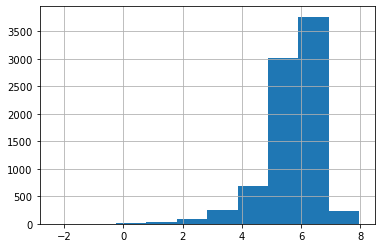

In [747]:
np.log(f['total claim amount']).hist()

Data splitting

In [748]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

In [749]:
X_train.describe()

,customer lifetime value,income,monthly premium auto
count,6468.000000,6468.000000,6468.000000
mean,6276.573739,50593.329159,104.966759
std,3236.943534,20902.849112,505.416978
min,1898.007675,10074.000000,0.000000
25%,3742.327016,34543.750000,68.000000
50%,5470.060561,50707.000000,80.000000
75%,8134.618245,62236.250000,107.000000
max,16344.608100,99981.000000,35353.000000


Variance threshold method

In [750]:
# Univariate method

In [751]:
from sklearn.feature_selection import VarianceThreshold # It only works with numerical features


X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

#display(X_train)
print("Initial number of numerical columns: ",X_train.shape)
print()


selector = VarianceThreshold(threshold=100) # Default threshold value is 0
# Features with a training-set variance lower than this threshold will be removed.
selector.fit(X_train)

kept_features_indexes = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features_indexes].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final number of numerical columns: ",X_train.shape)
print()
X_train

Initial number of numerical columns:  (6468, 3)

Final number of numerical columns:  (6468, 3)



,customer lifetime value,income,monthly premium auto
0,8940.579278,95351.0,111.0
1,2530.705137,89451.0,63.0
2,7381.914168,54878.0,96.0
3,5595.835000,79189.0,69.0
4,4988.579794,38928.0,64.0
...,...,...,...
6463,2619.027206,60477.0,65.0
6464,2448.811216,87802.0,63.0
6465,13092.585800,50707.0,188.0
6466,6411.675304,47606.0,81.0


In [752]:
#log.f.income.hist()

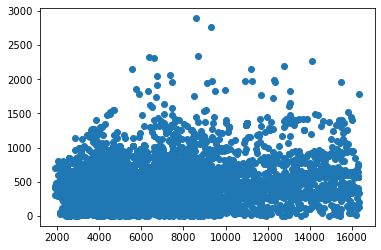

In [753]:
plt.Figure(figsize=[20,20])
plt.scatter(f['customer lifetime value'],f['total claim amount'])
plt.show()

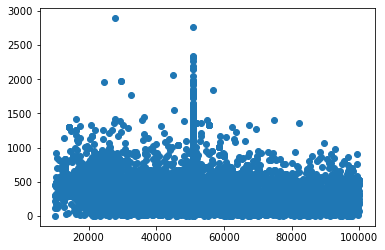

In [754]:
plt.Figure(figsize=[20,20])
plt.scatter(f['income'],f['total claim amount'])
plt.show()

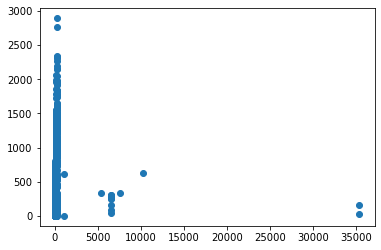

In [755]:
plt.Figure(figsize=[20,20])
plt.scatter(f['monthly premium auto'],f['total claim amount'])
plt.show()

Correlation matrix

In [756]:
import seaborn as sns
import matplotlib.pyplot as plt

c = abs(f.corr())
c

,customer lifetime value,income,monthly premium auto,total claim amount
customer lifetime value,1.000000,0.015898,0.024381,0.238889
income,0.015898,1.000000,0.014877,0.164404
monthly premium auto,0.024381,0.014877,1.000000,0.007220
total claim amount,0.238889,0.164404,0.007220,1.000000


['customer lifetime value', 'total claim amount']


,customer lifetime value,total claim amount
customer lifetime value,1.000000,0.238889
income,0.015898,0.164404
monthly premium auto,0.024381,0.007220
total claim amount,0.238889,1.000000


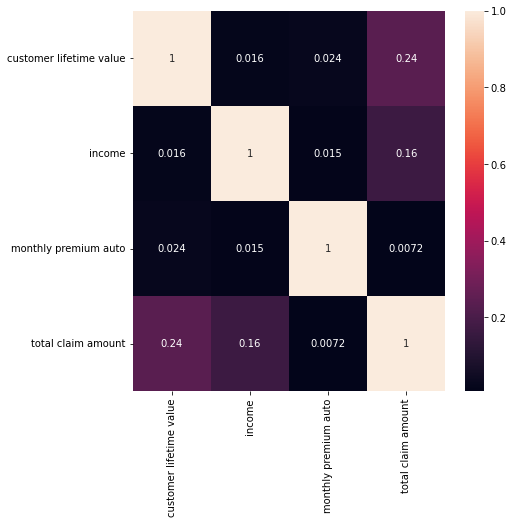

In [757]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(c, annot=True);

#c['SalePrice']
c_last = c['total claim amount'].sort_values(ascending=False)
c_last
c_thr = .2
cols_to_keep = list(c_last[c_last > c_thr].index)[1:] + [list(c_last[c_last > c_thr].index)[0]]

print(cols_to_keep)


c[cols_to_keep]

In [758]:
X_train.isnull().values.any()

False

In [759]:
X_train

,customer lifetime value,income,monthly premium auto
0,8940.579278,95351.0,111.0
1,2530.705137,89451.0,63.0
2,7381.914168,54878.0,96.0
3,5595.835000,79189.0,69.0
4,4988.579794,38928.0,64.0
...,...,...,...
6463,2619.027206,60477.0,65.0
6464,2448.811216,87802.0,63.0
6465,13092.585800,50707.0,188.0
6466,6411.675304,47606.0,81.0


In [760]:
np.any(np.isnan(X_train))

False

In [761]:
np.all(np.isfinite(X_train))

True

In [762]:
np.any(np.isnan(y_train))

False

In [763]:
np.all(np.isfinite(y_train))

True

Recursive feature elimination

In [764]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE  ## recursive feature elemination technique

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

#X_train.isna().sum()
nulls = pd.DataFrame(X_train.isna().sum()).reset_index()
#nulls.head()
nulls.columns = ['Column','nas']
#nulls.head()
#nulls[nulls['nas'] > 0].head()
cols_to_drop = nulls[nulls['nas'] > 0]['Column'] # Too drastic, but made on pourpose for quick filtering (don't do this in production!!)

X_train.drop(columns=cols_to_drop, axis=1, inplace = True)
X_test.drop(columns=cols_to_drop, axis=1, inplace = True)

#display(X_train)

lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 2, step = 1, verbose = 1) # Step is how many features to add or drop everytime
selector.fit(X_train, y_train)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final selected features: ")
display(X_train)

Fitting estimator with 3 features.
Final selected features: 


,customer lifetime value,monthly premium auto
0,8940.579278,111.0
1,2530.705137,63.0
2,7381.914168,96.0
3,5595.835000,69.0
4,4988.579794,64.0
...,...,...
6463,2619.027206,65.0
6464,2448.811216,63.0
6465,13092.585800,188.0
6466,6411.675304,81.0


OLS

In [765]:
model=LinearRegression()
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

LinearRegression: Train -> 0.023500779855589626, Test -> 0.01305212061781802


 lasso model could drop features and make it a feature selection technique


In [766]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=0.05)

model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Lasso: Train -> 0.023500768069158795, Test -> 0.013072338023412011


 Ridge


In [767]:
model=Ridge(alpha=10000)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Ridge: Train -> 0.02350077985558896, Test -> 0.01305212340429196


Fitting OLS model

In [788]:
x = f.drop(columns=['total claim amount'], axis = 1)
y = f['total claim amount']

X_added_constant = sm.add_constant(X)
#X_added_constant = np.array(X_added_constant)

In [793]:
X_added_constant=pd.get_dummies(X_added_constant,columns=["education"])

In [796]:
X_added_constant=pd.get_dummies(X_added_constant,columns=["vehicle class"])

In [798]:
X_added_constant=pd.get_dummies(X_added_constant,columns=["policy type"])

In [800]:
X_added_constant=pd.get_dummies(X_added_constant,columns=["state"])

In [802]:
X_added_constant=pd.get_dummies(X_added_constant,columns=["gender"])

In [803]:
X_added_constant

,const,customer lifetime value,income,monthly premium auto,number of open complaints,education_Bachelor,education_College,education_Doctor,education_High School or Below,education_Master,vehicle class_Four-Door Car,vehicle class_Luxury Vehicle,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,policy type_Corporate Auto,policy type_Personal Auto,policy type_Special Auto,state_Central,state_East,state_Noth West,state_West Region,gender_Female,gender_Male
0,1.0,7983.000000,50707.0,1000.0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1.0,6979.535900,50707.0,94.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
2,1.0,12887.431700,48767.0,108.0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0
3,1.0,7645.861800,50707.0,106.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
4,1.0,5363.076500,36357.0,68.0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8080,1.0,4100.398533,47761.0,104.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0
8081,1.0,3096.511217,21604.0,79.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0
8082,1.0,8163.890428,50707.0,85.0,3,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
8083,1.0,7524.442436,21941.0,96.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1


In [804]:
import statsmodels.api as sm

In [805]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8085 entries, 0 to 8084
Series name: total claim amount
Non-Null Count  Dtype  
--------------  -----  
8085 non-null   float64
dtypes: float64(1)
memory usage: 63.3 KB


In [808]:
# we need to add this constant value of 1 for the intercepts

model = sm.OLS(y,X_added_constant).fit()
model.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).